<a href="https://colab.research.google.com/github/yuniastariiy/IBM-Data-Analyst---Phyton/blob/main/Practice_Project_Data_Visualization_with_Phyton_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practice Assignment - Part 1: Analyzing wildfire activities in Australia**

In [94]:
%pip install seaborn
%pip install folium

### Importing Required Libraries

In [95]:
import numpy as np
import folium
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import requests
from io import StringIO
import folium
%matplotlib inline

# Dataset

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


### Importing Data

In [96]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"

response = requests.get(URL)
data = StringIO(response.text)

df = pd.read_csv(data)
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [97]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [98]:
# Column names
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [99]:
# Data type
df.dtypes

,0
Region,object
Date,object
Estimated_fire_area,float64
Mean_estimated_fire_brightness,float64
Mean_estimated_fire_radiative_power,float64
Mean_confidence,float64
Std_confidence,float64
Var_confidence,float64
Count,int64
Replaced,object


In [100]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [101]:
# Data type
df.dtypes

,0
Region,object
Date,object
Estimated_fire_area,float64
Mean_estimated_fire_brightness,float64
Mean_estimated_fire_radiative_power,float64
Mean_confidence,float64
Std_confidence,float64
Var_confidence,float64
Count,int64
Replaced,object


## Practice Tasks

### TASK 1.1: Let's try to understand the change in average estimated fire area over time <br>(use pandas to plot)


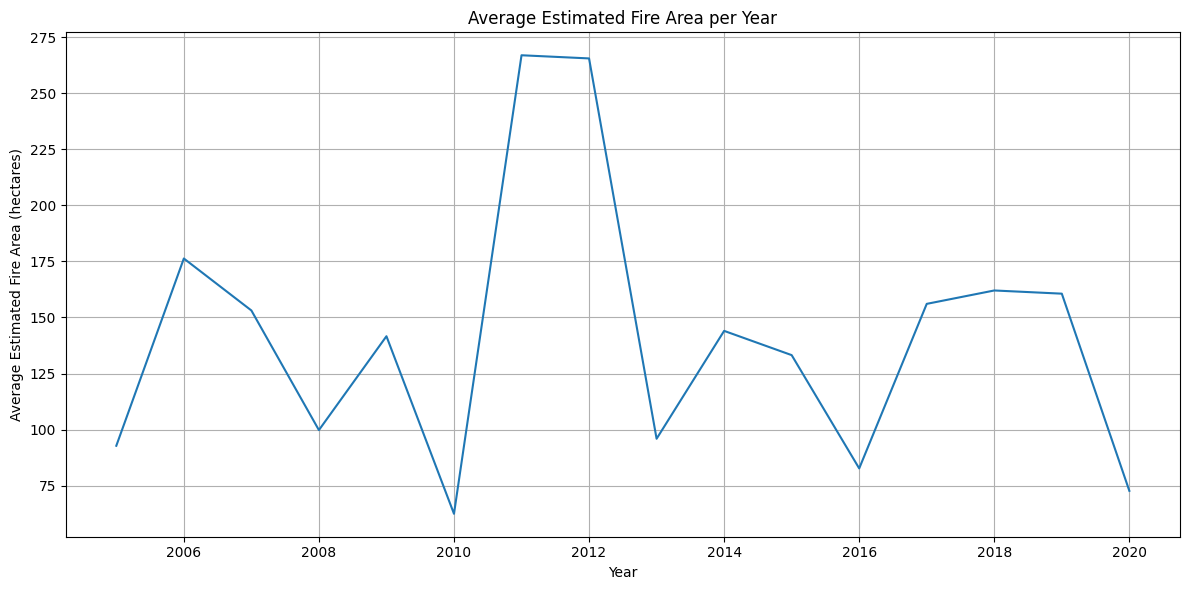

In [102]:
# Calculate the average estimated fire area per year
avg_area_by_year = df.groupby('Year')['Estimated_fire_area'].mean()

# Plot
avg_area_by_year.plot(kind='line', figsize=(12, 6), title='Average Estimated Fire Area per Year')
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (hectares)')
plt.grid(True)
plt.tight_layout()
plt.show()

### TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.

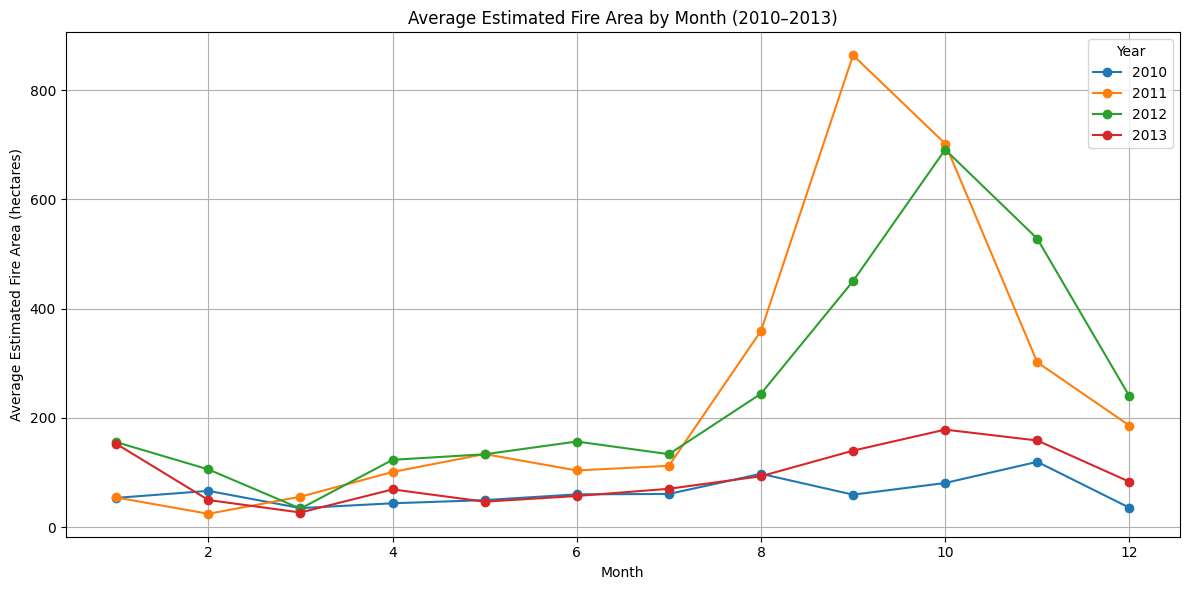

In [103]:
# Filter data for 2010 to 2013
df_filtered = df[(df['Year'] >= 2010) & (df['Year'] <= 2013)]

# Group by Year and Month, then calculate average fire area
avg_area_monthly = df_filtered.groupby(['Year', 'Month'])['Estimated_fire_area'].mean().unstack(level=0)

# Plot
avg_area_monthly.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Average Estimated Fire Area by Month (2010–2013)')
plt.xlabel('Month')
plt.ylabel('Average Estimated Fire Area (hectares)')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

### TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions<br> use the functionality of seaborn to develop a barplot

In [104]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

<ipython-input-105-346f9399d17f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Mean_estimated_fire_brightness', data=region_brightness, palette='OrRd')


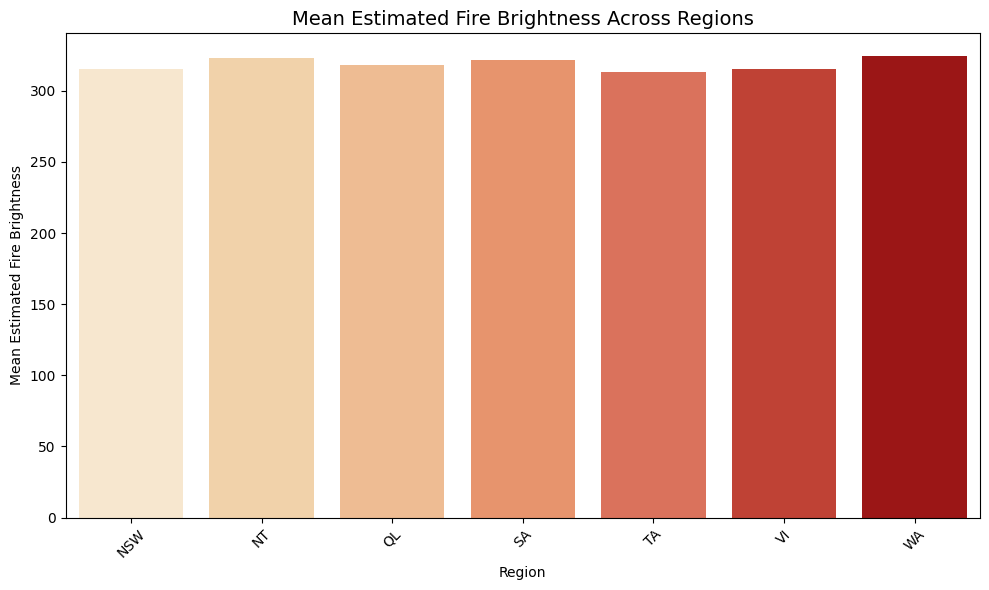

In [105]:
# Group by Region and calculate the mean brightness
region_brightness = df.groupby('Region')['Mean_estimated_fire_brightness'].mean().reset_index()

# Create the barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Mean_estimated_fire_brightness', data=region_brightness, palette='OrRd')

# Add labels and title
plt.title('Mean Estimated Fire Brightness Across Regions', fontsize=14)
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness')
plt.xticks(rotation=45)  # Rotates labels if regions have long names
plt.tight_layout()
plt.show()

### TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions

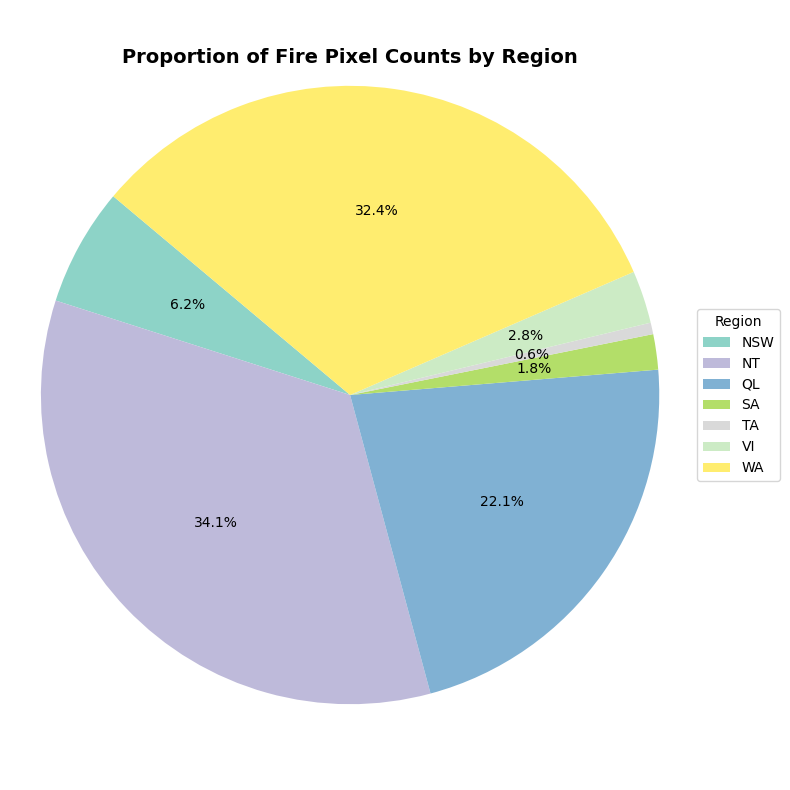

In [106]:
region_counts = df.groupby('Region')['Count'].sum()

colors = cm.Set3(np.linspace(0, 1, len(region_counts)))

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    region_counts,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 10, 'color': 'black'}
)

plt.legend(wedges, region_counts.index.tolist(), title="Region", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Proportion of Fire Pixel Counts by Region", fontsize=14, weight='bold', y=0.92)

plt.axis('equal')
plt.tight_layout()
plt.show()

### TASK 1.5: See the percentage on the pie is not looking so good as it is overlaped for Region SA, TA, VI

remove the autopct from pie function and pass the following to plt.legend() after plt.title() <br>
`[(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)]`


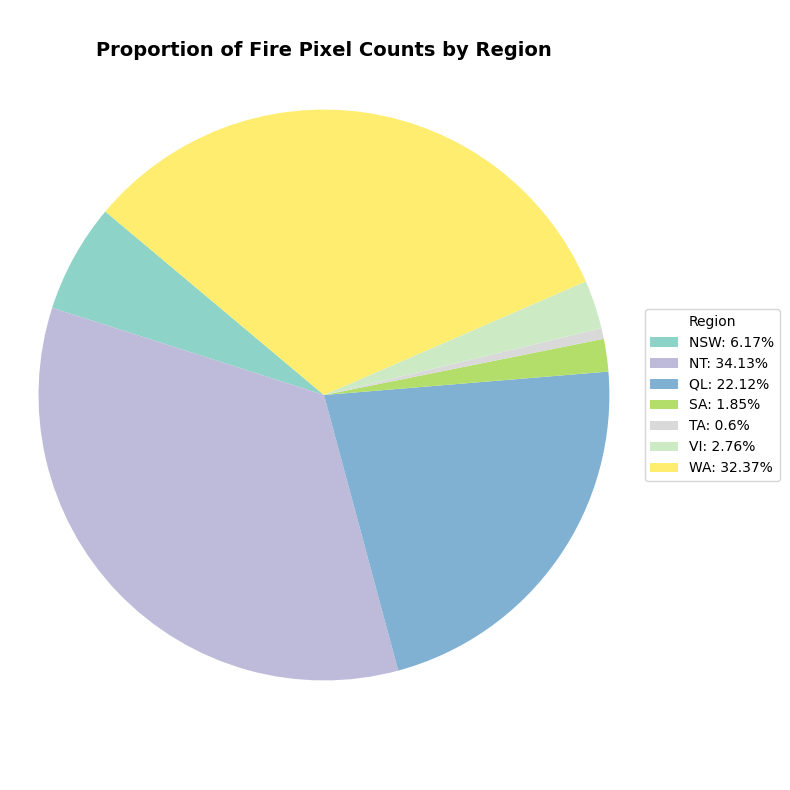

In [107]:
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(
    region_counts,
    labels=None,
    startangle=140,
    colors=colors
)

region_percentages = [(i, round(k / region_counts.sum() * 100, 2)) for i, k in zip(region_counts.index, region_counts)]
legend_labels = [f"{region}: {pct}%" for region, pct in region_percentages]

plt.legend(wedges, legend_labels, title="Region", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Proportion of Fire Pixel Counts by Region", fontsize=14, weight='bold', y=0.93)

plt.axis('equal')
plt.tight_layout()
plt.show()

### TASK 1.6: Let's try to develop a histogram of the mean estimated fire brightness<br> Using Matplotlib to create the histogram


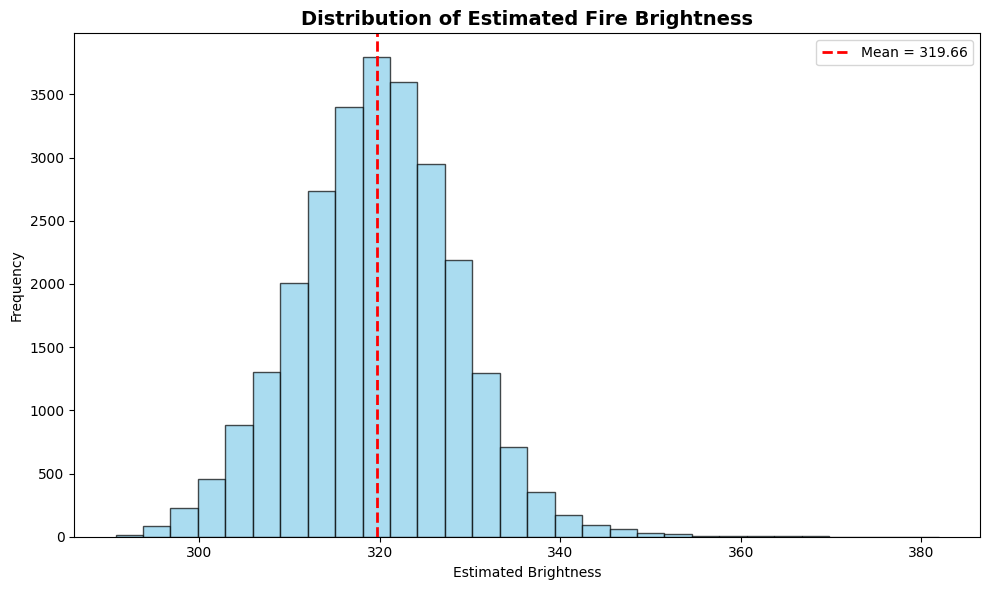

In [108]:
mean_brightness = df['Mean_estimated_fire_brightness'].mean()

plt.figure(figsize=(10, 6))
plt.hist(df['Mean_estimated_fire_brightness'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

plt.axvline(mean_brightness, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean_brightness:.2f}')

plt.title('Distribution of Estimated Fire Brightness', fontsize=14, weight='bold')
plt.xlabel('Estimated Brightness')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


### TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and  pass region as hue

<ipython-input-109-518ad85b6b4d>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Region')


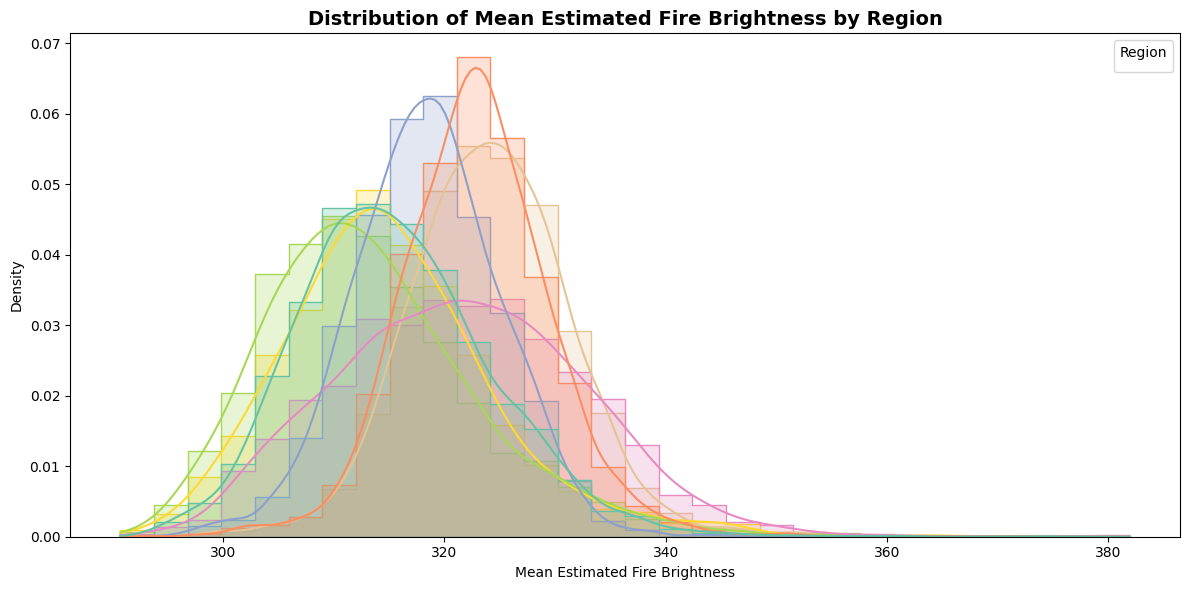

In [109]:
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,
    x='Mean_estimated_fire_brightness',
    hue='Region',
    bins=30,
    kde=True,
    element='step',
    stat='density',
    common_norm=False,
    palette='Set2'
)

plt.title('Distribution of Mean Estimated Fire Brightness by Region', fontsize=14, weight='bold')
plt.xlabel('Mean Estimated Fire Brightness')
plt.ylabel('Density')
plt.legend(title='Region')
plt.tight_layout()
plt.show()


<ipython-input-110-6d1a1c843227>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Region')


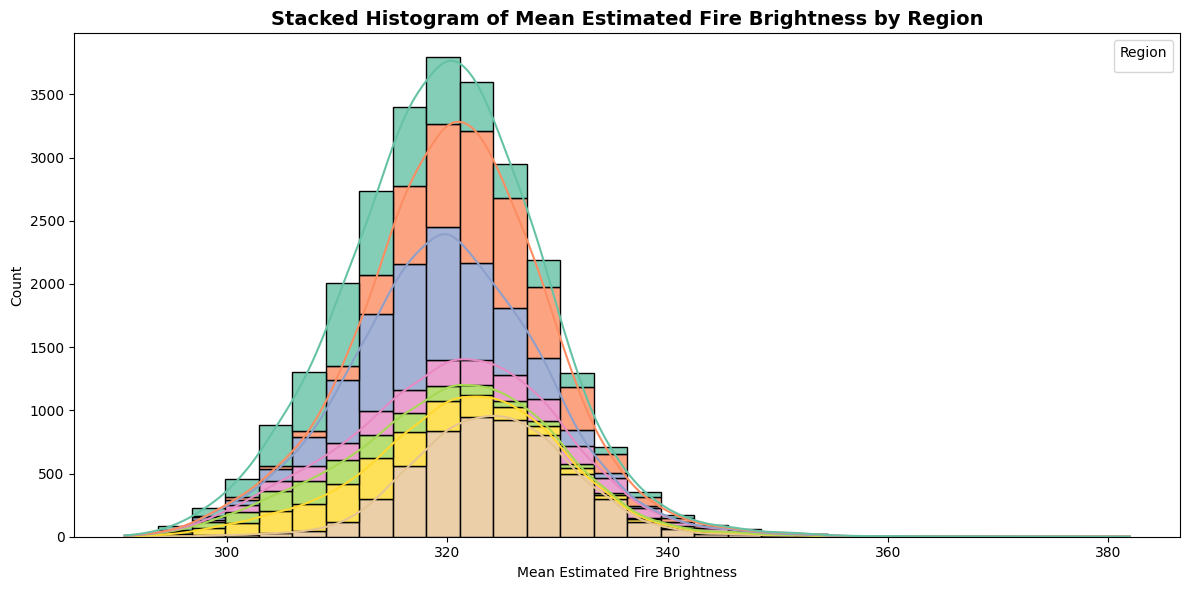

In [110]:
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,
    x='Mean_estimated_fire_brightness',
    hue='Region',
    bins=30,
    multiple='stack',  # <- Stack bars instead of overlay
    kde=True,
    palette='Set2',
    edgecolor='black',
    alpha=0.8
)

# Add labels and title
plt.title('Stacked Histogram of Mean Estimated Fire Brightness by Region', fontsize=14, weight='bold')
plt.xlabel('Mean Estimated Fire Brightness')
plt.ylabel('Count')
plt.legend(title='Region')
plt.tight_layout()
plt.show()


### TASK 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?


In [111]:
correlation = df['Mean_estimated_fire_radiative_power'].corr(df['Mean_confidence'])
print(f"Pearson correlation coefficient: {correlation:.2f}")


Pearson correlation coefficient: 0.45


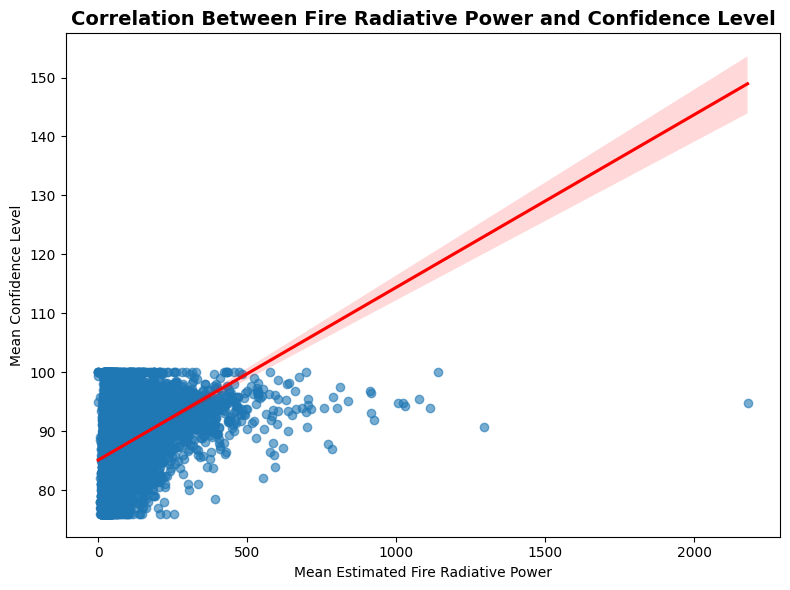

In [112]:
plt.figure(figsize=(8, 6))

sns.regplot(
    data=df,
    x='Mean_estimated_fire_radiative_power',
    y='Mean_confidence',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=95
)

plt.title('Correlation Between Fire Radiative Power and Confidence Level', fontsize=14, weight='bold')
plt.xlabel('Mean Estimated Fire Radiative Power')
plt.ylabel('Mean Confidence Level')
plt.tight_layout()
plt.show()


### TASK 1.9: Let's mark these seven regions on the Map of Australia using Folium
<br> we have created a dataframe for you containing the regions, their latitudes and longitudes. <br> For australia use [-25, 135] as location to create the map

In [113]:
# Initialize a folium map centered over Australia
australia_map = folium.Map(location=[-25, 135], zoom_start=4)

region_locations = pd.DataFrame({
    'Region': ['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'],
    'Latitude': [-31.2532, -19.4914, -20.9176, -30.0002, -42.0409, -37.0201, -27.6728],
    'Longitude': [146.9211, 132.5509, 142.7028, 136.2092, 146.8060, 144.9646, 121.6283]
})

# Add region markers to the map
for index, row in region_locations.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['Region'],
        tooltip=row['Region'],
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(australia_map)

# Display the map
australia_map
